In [12]:
using CSV
using DataFrames

In [13]:
unfilteredData = DataFrame(CSV.File("../../Data/Dataset/processedKaggle.csv"))
times = unfilteredData[!,:datetime]

function extractDate(x)
    if x === missing
        return "nodate"
    end
    m = match(r"(?<date>\d{4}-\d{2}-\d{2}) .*",x)
    if m == nothing
        return "nodate"    
    else
        return m[:date]
    end
end
dates = map(x->extractDate(x), times)
insertcols!(unfilteredData,:datetime,:date=>dates)

10365152×7 DataFrame
      Row │ ip              request                            useragent       ⋯
          │ String15        String?                            String?         ⋯
──────────┼─────────────────────────────────────────────────────────────────────
        1 │ 54.36.149.41    GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
        2 │ 31.56.96.51     GET /image/60844/productModel/20…  Mozilla/5.0 (Li
        3 │ 31.56.96.51     GET /image/61474/productModel/20…  Mozilla/5.0 (Li
        4 │ 40.77.167.129   GET /image/14925/productModel/10…  Mozilla/5.0 (co
        5 │ 91.99.72.15     GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi ⋯
        6 │ 40.77.167.129   GET /image/23488/productModel/15…  Mozilla/5.0 (co
        7 │ 40.77.167.129   GET /image/45437/productModel/15…  Mozilla/5.0 (co
        8 │ 40.77.167.129   GET /image/576/article/100x100 H…  Mozilla/5.0 (co
        9 │ 66.249.66.194   GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co ⋯
       10 │ 40.77.167.129   GET /image/57710/productModel/10…  Mozilla/5.0 (co
       11 │ 207.46.13.136   GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
    ⋮     │       ⋮                         ⋮                                  ⋱
 10365143 │ 109.125.169.52  GET / HTTP/1.1                     Mozilla/5.0 (Wi
 10365144 │ 5.113.60.62     GET /static/images/amp/instagram…  Mozilla/5.0 (Li ⋯
 10365145 │ 5.113.60.62     GET /static/images/amp/telegram.…  Mozilla/5.0 (Li
 10365146 │ 5.113.60.62     GET /static/images/amp/blog.png …  Mozilla/5.0 (Li
 10365147 │ 5.113.60.62     GET /static/images/amp/third-par…  Mozilla/5.0 (Li
 10365148 │ 188.229.21.56   GET /content/view/shoppingRules …  Mozilla/5.0 (Li ⋯
 10365149 │ 5.127.220.71    GET /apple-touch-icon-120x120.pn…  MobileSafari/60
 10365150 │ 5.213.7.50      GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 10365151 │ 109.125.169.52  GET /image/%7B%7BbasketItem.id%7…  Mozilla/5.0 (Wi
 10365152 │ 37.129.59.160   GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                             5 columns and 10365131 rows omitted

In [14]:
function filterOut(x)
    if x === missing
        return false
    end
    if occursin(r"(/static/|/image/|/settings/logo|[.](png|jpg|css|js|ico))",x) || occursin(r"HEAD",x)
        return false
    else
        return true
    end
end

fullData = subset(unfilteredData, :request => ByRow(x->passmissing(filterOut)(x)), skipmissing=true)

2053481×7 DataFrame
     Row │ ip               request                            useragent       ⋯
         │ String15         String?                            String?         ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ 54.36.149.41     GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
       2 │ 91.99.72.15      GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi
       3 │ 66.249.66.194    GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co
       4 │ 207.46.13.136    GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
       5 │ 178.253.33.51    GET /m/product/32574/62991/%D9%8…  Mozilla/5.0 (Li ⋯
       6 │ 91.99.72.15      GET /product/10075/13903/%D9%85%…  Mozilla/5.0 (X1
       7 │ 207.46.13.136    GET /product/14926 HTTP/1.1        Mozilla/5.0 (co
       8 │ 66.249.66.194    GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Li
       9 │ 91.99.72.15      GET /product/32798/63266/%DB%8C%…  Mozilla/5.0 (X1 ⋯
      10 │ 66.249.66.91     GET /filter/b874%2Cb32%2Cb63%2Cb…  Mozilla/5.0 (co
      11 │ 5.78.198.52      GET /m/product/33978/64784/%DA%A…  Mozilla/5.0 (Li
    ⋮    │        ⋮                         ⋮                                  ⋱
 2053472 │ 5.120.63.25      GET /m/browse/stove-and-oven HTT…  Mozilla/5.0 (Li
 2053473 │ 66.249.66.194    GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (co ⋯
 2053474 │ 37.129.59.160    GET /basket/add/62424?mobile=1&a…  Mozilla/5.0 (Li
 2053475 │ 91.99.55.165     GET /m/filter/p2597%2Cb231?page=…  Mozilla/5.0 (Li
 2053476 │ 13.66.139.0      GET /product/29746/%D9%85%D8%A7%…  Mozilla/5.0 (co
 2053477 │ 45.79.177.249    GET /m/browse/evaporative-air-co…  Mozilla/5.0 (iP ⋯
 2053478 │ 109.125.169.52   GET / HTTP/1.1                     Mozilla/5.0 (Wi
 2053479 │ 188.229.21.56    GET /content/view/shoppingRules …  Mozilla/5.0 (Li
 2053480 │ 5.213.7.50       GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 2053481 │ 37.129.59.160    GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                              5 columns and 2053460 rows omitted

In [15]:
bots = subset(fullData, :useragent => ByRow(x -> passmissing(occursin)(r"bot", x)), skipmissing=true)

728086×7 DataFrame
    Row │ ip              request                            useragent         ⋯
        │ String15        String?                            String?           ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 54.36.149.41    GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (comp ⋯
      2 │ 66.249.66.194   GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (comp
      3 │ 207.46.13.136   GET /product/10214 HTTP/1.1        Mozilla/5.0 (comp
      4 │ 207.46.13.136   GET /product/14926 HTTP/1.1        Mozilla/5.0 (comp
      5 │ 66.249.66.194   GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Linu ⋯
      6 │ 66.249.66.91    GET /filter/b874%2Cb32%2Cb63%2Cb…  Mozilla/5.0 (comp
      7 │ 207.46.13.136   GET /product/30649?model=60398 H…  Mozilla/5.0 (comp
      8 │ 66.249.66.194   GET /m/browse/gas-heater/%D8%A8%…  Mozilla/5.0 (Linu
      9 │ 66.249.66.194   GET /m/article/608/%D8%B9%D9%84%…  Mozilla/5.0 (Linu ⋯
     10 │ 54.36.149.70    GET /filter/b215,b400,p5686,v1|%…  Mozilla/5.0 (comp
     11 │ 66.249.66.194   GET /product/81900 HTTP/1.1        Mozilla/5.0 (comp
   ⋮    │       ⋮                         ⋮                                  ⋮ ⋱
 728077 │ 40.77.167.122   GET /product/13158 HTTP/1.1        Mozilla/5.0 (comp
 728078 │ 66.249.66.194   GET /m/filter/b1,b105,b143,b148,…  Mozilla/5.0 (Linu ⋯
 728079 │ 207.46.13.96    GET /filter/b2%2Cb268%2Cb703 HTT…  Mozilla/5.0 (comp
 728080 │ 13.66.139.0     GET /product/22837/48495/%D8%A7%…  Mozilla/5.0 (comp
 728081 │ 66.249.66.91    GET /filter/b874%2Cb226%2Cb570%2…  Mozilla/5.0 (comp
 728082 │ 66.249.66.92    GET /filter/b481%2Cb874%2Cb226%2…  Mozilla/5.0 (comp ⋯
 728083 │ 66.249.66.91    GET /filter/b481%2Cb656%2Cb43%2C…  Mozilla/5.0 (comp
 728084 │ 31.184.133.100  GET /filter/b583,b523 HTTP/1.1     Mozilla/5.0 (comp
 728085 │ 66.249.66.194   GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (comp
 728086 │ 13.66.139.0     GET /product/29746/%D9%85%D8%A7%…  Mozilla/5.0 (comp ⋯
                                               5 columns and 728065 rows omitted

In [16]:
groupByIPDate = groupby(bots,[:ip,:date])

GroupedDataFrame with 2955 groups based on keys: ip, date
First Group (37 rows): ip = "54.36.149.41", date = "2019-01-22"
 Row │ ip            request                            useragent              ⋯
     │ String15      String?                            String?                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 54.36.149.41  GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (compatibl ⋯
   2 │ 54.36.149.41  GET /login/auth?forwardUri=%2Ffi…  Mozilla/5.0 (compatibl
   3 │ 54.36.149.41  GET /blog/cosmetic/%DA%86%DA%AF%…  Mozilla/5.0 (compatibl
   4 │ 54.36.149.41  GET /filter/5970|%D8%AA%D9%84%D8…  Mozilla/5.0 (compatibl
   5 │ 54.36.149.41  GET /filter/b192,p13010,v1|%D8%B…  Mozilla/5.0 (compatibl ⋯
   6 │ 54.36.149.41  GET /filter/b632%2Cp1%2Cb3 HTTP/…  Mozilla/5.0 (compatibl
   7 │ 54.36.149.41  GET /filter/b656,b854 HTTP/1.1     Mozilla/5.0 (compatibl
   8 │ 54.36.149.41  GET /product/34294/%D9%84%D9%BE-…  Mozilla/5.0 (compatibl
   9 │ 54.36.149.41  GET /filter/p11675,v1|%D8%B7%D9%…  Mozilla/5.0 (compatibl ⋯
  10 │ 54.36.149.41  GET /filter/6168|1366x768,b18,p3…  Mozilla/5.0 (compatibl
  11 │ 54.36.149.41  GET /filter/b903%2Cp5506%2Cstexi…  Mozilla/5.0 (compatibl
  ⋮  │      ⋮                        ⋮                                  ⋮      ⋱
  27 │ 54.36.149.41  GET /filter/p11675%2Cv1%7C%D8%AE…  Mozilla/5.0 (compatibl
  28 │ 54.36.149.41  GET /filter/331%7C1000%20%D8%AA%…  Mozilla/5.0 (compatibl ⋯
  29 │ 54.36.149.41  GET /product/20131/43687/%DA%AF%…  Mozilla/5.0 (compatibl
  30 │ 54.36.149.41  GET /filter/p26666 HTTP/1.1        Mozilla/5.0 (compatibl
  31 │ 54.36.149.41  GET /filter/b145,b215,b878,p8 HT…  Mozilla/5.0 (compatibl
  32 │ 54.36.149.41  GET /filter/p5623%2Cv1%7C%20%D9%…  Mozilla/5.0 (compatibl ⋯
  33 │ 54.36.149.41  GET /filter/b139,b653,b77,p51 HT…  Mozilla/5.0 (compatibl
  34 │ 54.36.149.41  GET /filter/p6385,v1|%20%D8%B5%D…  Mozilla/5.0 (compatibl
  35 │ 54.36.149.41  GET /product/32844/%D8%AA%D9%84%…  Mozilla/5.0 (compatibl
  36 │ 54.36.149.41  GET /filter/p5508%2Cv1%7C%D8%B2%…  Mozilla/5.0 (compatibl ⋯
  37 │ 54.36.149.41  GET /filter/p26668%2Cv1%7C%D8%B3…  Mozilla/5.0 (compatibl
                                                   5 columns and 15 rows omitted
⋮
Last Group (1 row): ip = "192.243.56.76", date = "2019-01-26"
 Row │ ip             request                            useragent             ⋯
     │ String15       String?                            String?               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 192.243.56.76  GET /browse/perfume/%D8%B9%D8%B7…  Mozilla/5.0 (compatib ⋯
                                                               5 columns omitted

In [17]:
weightedGraph = Dict()

for g in groupByIPDate
    firstRequest = true
    prevReq = ""
    for rec in eachrow(g)
        if firstRequest
            firstRequest = false
            continue
        end
        edge = rec[:request] => prevReq
        count = get!(weightedGraph,edge, 0)  
        weightedGraph[edge] = count+1
        prevReq = rec[:request]
    end
end

In [18]:
sortedGraph = sort(collect(weightedGraph), by=x->x[2], rev=true)

697387-element Vector{Pair{Any, Any}}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ("GET /robots.txt HTTP/1.1" => "GET /robots.txt HTTP/1.1") => 338
                                                                             

In [19]:
source = map(x ->first(first(x)), sortedGraph)
dest = map(x ->last(first(x)), sortedGraph)
weight = map(x ->last(x), sortedGraph)

graphDf = DataFrame(source=source, destination=dest, weight=weight)

697387×3 DataFrame
    Row │ source                             destination                       ⋯
        │ String                             String                            ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ GET /robots.txt HTTP/1.1           GET /robots.txt HTTP/1.1          ⋯
      2 │ GET / HTTP/1.1                     GET / HTTP/1.1
      3 │ GET /robots.txt HTTP/1.1
      4 │ GET / HTTP/1.1                     GET /robots.txt HTTP/1.1
      5 │ GET / HTTP/1.1                                                       ⋯
      6 │ GET /robots.txt HTTP/1.1           GET / HTTP/1.1
      7 │ GET /m/browse/sandwich-maker/%D8…  GET /m/browse/home-appliances/%D…
      8 │ GET /m/article/606/%D8%B9%D9%84%…  GET /m/article/618/%D8%AE%D9%88%…
      9 │ GET /m/browse/refrigerator-and-f…  GET /m/browse/dishwasher/%D9%85%… ⋯
     10 │ GET /m/browse/cooktop/%D8%A7%D8%…  GET /m/browse/refrigerator-and-f…
     11 │ GET /m/filter/b1,p62 HTTP/1.1      GET /m/filter/b2,p65 HTTP/1.1
   ⋮    │                 ⋮                                  ⋮                 ⋱
 697378 │ GET /filter/p5%2Cb36%2Cstexists …  GET /m/browse/tensiometre/%D9%81…
 697379 │ GET /filter/b52%2Cp41%2Cv1%7C%D8…  GET /filter/p3%2Cv1%7C%D8%B3%D9%… ⋯
 697380 │ GET /filter/b1,b103,b105,b109,b1…  GET /filter/b143,b3,b43,p1 HTTP/…
 697381 │ GET /m/filter/979%7C1.8%20%D9%84…  GET /m/filter/b113 HTTP/1.1
 697382 │ GET /m/browse/fan/%D9%BE%D9%86%D…  GET /m/filter/b20,b238,b3,b543,b…
 697383 │ GET /filter/b8,p3,t14 HTTP/1.1     GET /m/product/27794/%D9%85%D8%A… ⋯
 697384 │ GET /product/33952/64703/%DA%AF%…  GET /filter/b105%2Cb645?page=6 H…
 697385 │ GET /m/product/33896/%DB%8C%D8%A…  GET /product/30364/%D8%B9%D8%B7%…
 697386 │ GET /m/filter/b2,p3 HTTP/1.1       GET /m/filter/b103,b126,b135,b14…
 697387 │ GET /filter/b67%2Cb570%2Cb598%2C…  GET /filter/b67%2Cb226%2Cb570%2C… ⋯
                                                1 column and 697366 rows omitted

In [20]:
using Plots
gr()
using DataWrangler

In [21]:
insertcols!(graphDf,:weight,:normWeights=>boxcox(graphDf[!,:weight])[:x])

697387×4 DataFrame
    Row │ source                             destination                       ⋯
        │ String                             String                            ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ GET /robots.txt HTTP/1.1           GET /robots.txt HTTP/1.1          ⋯
      2 │ GET / HTTP/1.1                     GET / HTTP/1.1
      3 │ GET /robots.txt HTTP/1.1
      4 │ GET / HTTP/1.1                     GET /robots.txt HTTP/1.1
      5 │ GET / HTTP/1.1                                                       ⋯
      6 │ GET /robots.txt HTTP/1.1           GET / HTTP/1.1
      7 │ GET /m/browse/sandwich-maker/%D8…  GET /m/browse/home-appliances/%D…
      8 │ GET /m/article/606/%D8%B9%D9%84%…  GET /m/article/618/%D8%AE%D9%88%…
      9 │ GET /m/browse/refrigerator-and-f…  GET /m/browse/dishwasher/%D9%85%… ⋯
     10 │ GET /m/browse/cooktop/%D8%A7%D8%…  GET /m/browse/refrigerator-and-f…
     11 │ GET /m/filter/b1,p62 HTTP/1.1      GET /m/filter/b2,p65 HTTP/1.1
   ⋮    │                 ⋮                                  ⋮                 ⋱
 697378 │ GET /filter/p5%2Cb36%2Cstexists …  GET /m/browse/tensiometre/%D9%81…
 697379 │ GET /filter/b52%2Cp41%2Cv1%7C%D8…  GET /filter/p3%2Cv1%7C%D8%B3%D9%… ⋯
 697380 │ GET /filter/b1,b103,b105,b109,b1…  GET /filter/b143,b3,b43,p1 HTTP/…
 697381 │ GET /m/filter/979%7C1.8%20%D9%84…  GET /m/filter/b113 HTTP/1.1
 697382 │ GET /m/browse/fan/%D9%BE%D9%86%D…  GET /m/filter/b20,b238,b3,b543,b…
 697383 │ GET /filter/b8,p3,t14 HTTP/1.1     GET /m/product/27794/%D9%85%D8%A… ⋯
 697384 │ GET /product/33952/64703/%DA%AF%…  GET /filter/b105%2Cb645?page=6 H…
 697385 │ GET /m/product/33896/%DB%8C%D8%A…  GET /product/30364/%D8%B9%D8%B7%…
 697386 │ GET /m/filter/b2,p3 HTTP/1.1       GET /m/filter/b103,b126,b135,b14…
 697387 │ GET /filter/b67%2Cb570%2Cb598%2C…  GET /filter/b67%2Cb226%2Cb570%2C… ⋯
                                               2 columns and 697366 rows omitted

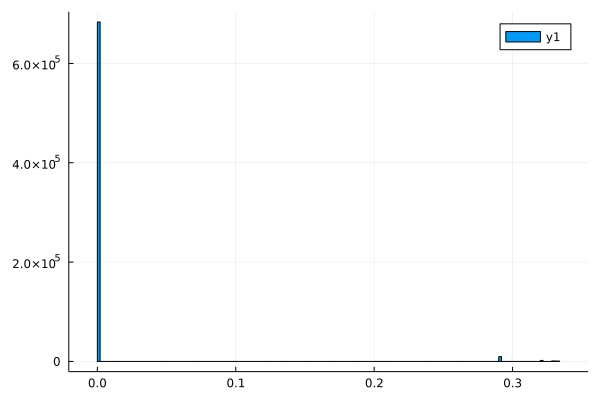

In [22]:
histogram(graphDf[!,:normWeights], bins = :scott)

In [23]:
CSV.write("../../Data/Graph/botWeightedGraph.csv", graphDf)

"../../Data/Graph/botWeightedGraph.csv"

In [24]:
count(>=(0.2), graphDf[!,:normWeights])

14019